In [58]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from colormap import rgb2hex

In [43]:
I = Image.open("jarrones.jpg")

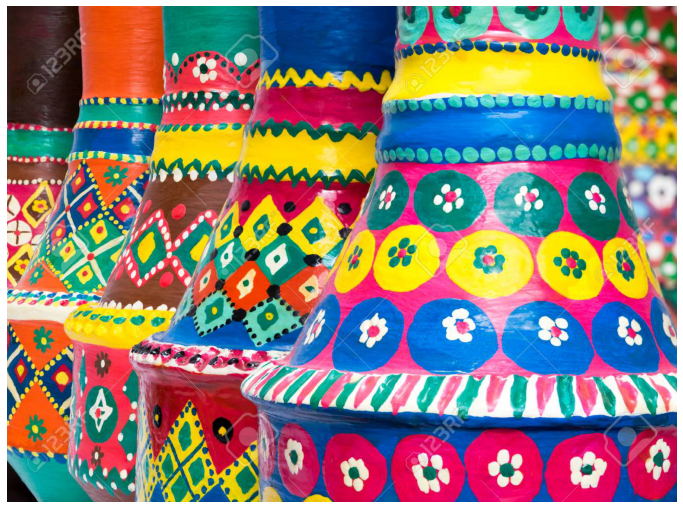

In [16]:
a = np.asarray(I,dtype=np.float32)/255
plt.figure(figsize=(12,12))
plt.imshow(a)
plt.axis('off')
plt.show()

In [17]:
w, h = I.size
colors = I.getcolors(w * h)
num_colores = len(colors) 
num_pixels = w*h 

print(u'Número de pixels  = ', num_pixels)
print(u'Número de colores = ', num_colores)

Número de pixels  =  1250600
Número de colores =  535633


In [18]:
x, y, z = a.shape
print('Dimensiones matriz a ', a.shape)

a1 = a.reshape(x*y, z)
print('Dimensiones matriz a1 ', a1.shape)

Dimensiones matriz a  (962, 1300, 3)
Dimensiones matriz a1  (1250600, 3)


In [19]:
n = 80
k_means = KMeans(n_clusters=n)
k_means.fit(a1)

KMeans(n_clusters=80)

In [20]:
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

print('dimensiones centroides ', centroides.shape)
print('dimensiones etiquetas ', etiquetas.shape)

dimensiones centroides  (80, 3)
dimensiones etiquetas  (1250600,)


In [21]:
a2 = centroides[etiquetas]
print('Dimensiones matriz a2 ', a2.shape)

a3 = a2.reshape(x,y,z)
print('Dimensiones matriz a3 ', a3.shape)

Dimensiones matriz a2  (1250600, 3)
Dimensiones matriz a3  (962, 1300, 3)


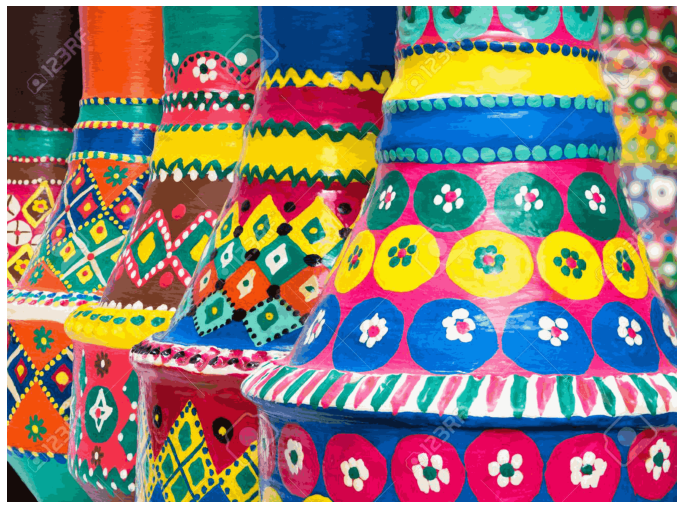

In [38]:
plt.figure(figsize=(12,12))
plt.imshow(a3)
plt.axis('off')
plt.show()

In [39]:
a4 = np.floor(a3*255)
a5 = a4.astype(np.uint8)

I1 = Image.fromarray(a5)
I1.save("imagen_comprimida.jpg")

In [40]:
w, h = I1.size
colors = I1.getcolors(w * h)
num_colores = len(colors) 
num_pixels = w*h 

print(u'Número de pixels  = ', num_pixels)
print(u'Número de colores = ', num_colores)

Número de pixels  =  1250600
Número de colores =  80


In [41]:
porcentajes = []
for color in colors:
    porcentaje = (color[0]*100)/num_pixels
    porcentajes.append((porcentaje, color[1]))    

In [42]:
for elemento in porcentajes:
    print("Color", elemento[1])
    print("Porcentaje", elemento[0])

Color (228, 190, 127)
Porcentaje 0.6948664640972333
Color (154, 212, 222)
Porcentaje 0.6573644650567727
Color (4, 44, 94)
Porcentaje 1.517351671197825
Color (142, 9, 30)
Porcentaje 0.9664161202622741
Color (203, 195, 189)
Porcentaje 0.9817687509995202
Color (201, 140, 157)
Porcentaje 0.8878138493523109
Color (51, 124, 188)
Porcentaje 0.5223092915400608
Color (246, 158, 187)
Porcentaje 1.0999520230289461
Color (248, 84, 155)
Porcentaje 1.1521669598592676
Color (3, 59, 123)
Porcentaje 2.490724452262914
Color (234, 2, 91)
Porcentaje 2.8060131137054216
Color (240, 230, 218)
Porcentaje 2.545738045738046
Color (148, 164, 186)
Porcentaje 0.6364145210299057
Color (60, 138, 121)
Porcentaje 0.7864225171917479
Color (96, 60, 89)
Porcentaje 0.5768431153046538
Color (160, 43, 57)
Porcentaje 0.9684951223412762
Color (247, 17, 121)
Porcentaje 1.2431632816248201
Color (5, 165, 152)
Porcentaje 1.6520070366224213
Color (2, 110, 216)
Porcentaje 2.4864065248680634
Color (51, 28, 24)
Porcentaje 1.714377098

In [63]:
x=[]
y=[]
for elemento in porcentajes:
    y.append(rgb2hex(elemento[1][0], elemento[1][1] , elemento[1][2]))
    x.append(elemento[0])

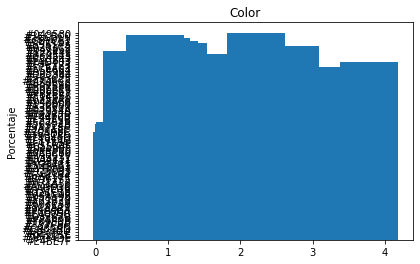

In [66]:
fig, ax = plt.subplots()
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('Porcentaje')
#Colocamos una etiqueta en el eje X
ax.set_title('Color')
#Creamos la grafica de barras utilizando 'paises' como eje X y 'ventas' como eje y.
plt.bar(x, y)
#Finalmente mostramos la grafica con el metodo show()
plt.show()